# Clustering - Modeling

In [97]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
# import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)


from sklearn.cluster import KMeans
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## Iris Dataset

In [44]:
# import iris data

from pydataset import data

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [45]:
# rename the columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


1. Clustering with the Iris Dataset

    Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.

    b. Visualize the results of your clustering.

    c. Use the elbow method to visually select a good value for k.

    d. Repeat the clustering, this time with 3 different features.

In [46]:
# define the independent variables for k-means

X = iris[['sepal_width', 'petal_length']]
X.head()

,sepal_width,petal_length
1,3.5,1.4
2,3.0,1.4
3,3.2,1.3
4,3.1,1.5
5,3.6,1.4


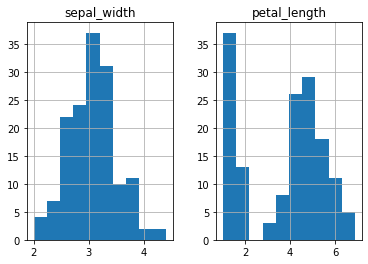

In [47]:
# look at distribution of the independent variables chosen

X.hist();

In [48]:
# Scale the X before modeling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,sepal_width,petal_length
1,1.019004,-1.340227
2,-0.131979,-1.340227
3,0.328414,-1.397064
4,0.098217,-1.283389
5,1.249201,-1.340227


In [49]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123, verbose = 1)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

Initialization complete
Iteration 0, inertia 117.09128060247045
Iteration 1, inertia 88.64354782048348
Iteration 2, inertia 82.60249277184619
Iteration 3, inertia 78.79764875499048
Iteration 4, inertia 76.57146161708651
Iteration 5, inertia 75.80897150559994
Iteration 6, inertia 75.51903605807848
Iteration 7, inertia 75.28060206611225
Iteration 8, inertia 75.20899209477426
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 108.77305864637275
Iteration 1, inertia 88.11527471175279
Iteration 2, inertia 82.60249277184619
Iteration 3, inertia 78.79764875499048
Iteration 4, inertia 76.57146161708651
Iteration 5, inertia 75.80897150559994
Iteration 6, inertia 75.51903605807848
Iteration 7, inertia 75.28060206611225
Iteration 8, inertia 75.20899209477426
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 109.58577984359212
Iteration 1, inertia 76.06406545415402
Iteration 2, inertia 75.9478037066799
Iteration 3, in

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [50]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [51]:
# look at a sample of iris
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
145,6.7,3.3,5.7,2.5,virginica,0
11,5.4,3.7,1.5,0.2,setosa,1
141,6.7,3.1,5.6,2.4,virginica,0
36,5.0,3.2,1.2,0.2,setosa,1
113,6.8,3.0,5.5,2.1,virginica,0
116,6.4,3.2,5.3,2.3,virginica,0
63,6.0,2.2,4.0,1.0,versicolor,2
106,7.6,3.0,6.6,2.1,virginica,0
84,6.0,2.7,5.1,1.6,versicolor,2
90,5.5,2.5,4.0,1.3,versicolor,2


In [53]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 0.01052328,  0.84485677],
       [ 0.90625492, -1.30310821],
       [-1.18603836,  0.27964014]])

In [54]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_length
0,0.010523,0.844857
1,0.906255,-1.303108
2,-1.186038,0.279640


In [55]:
# Labels (same as from predict)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

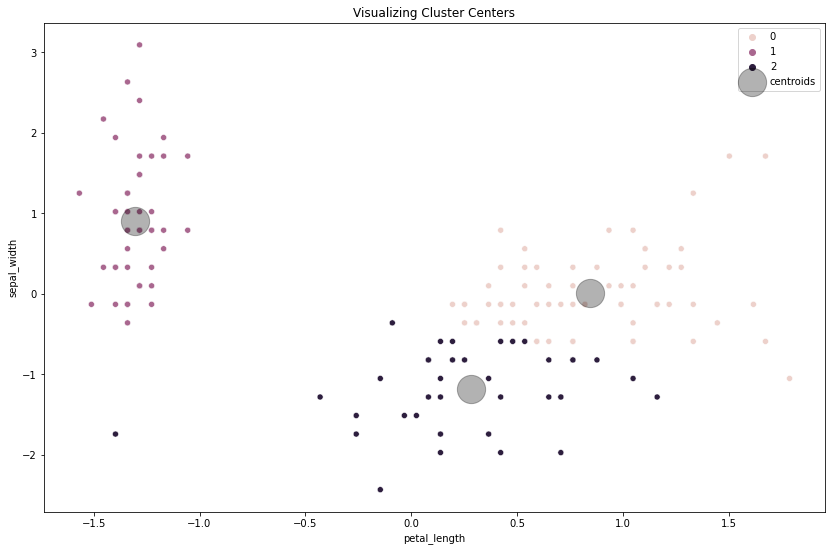

In [56]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y ='sepal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_length', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [57]:
# to avoid Seaborn 'hue' issue with integers, I change the cluster columns from integer to string
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_1
2,4.9,3.0,1.4,0.2,setosa,cluster_1
3,4.7,3.2,1.3,0.2,setosa,cluster_1
4,4.6,3.1,1.5,0.2,setosa,cluster_1
5,5.0,3.6,1.4,0.2,setosa,cluster_1


In [58]:
# choosing K

In [59]:
X = iris[['petal_length', 'sepal_width']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

116.65832736381971

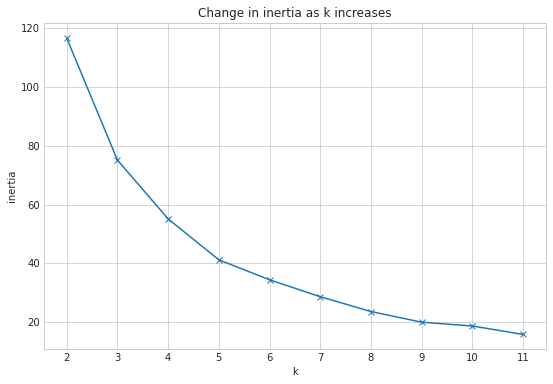

In [60]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

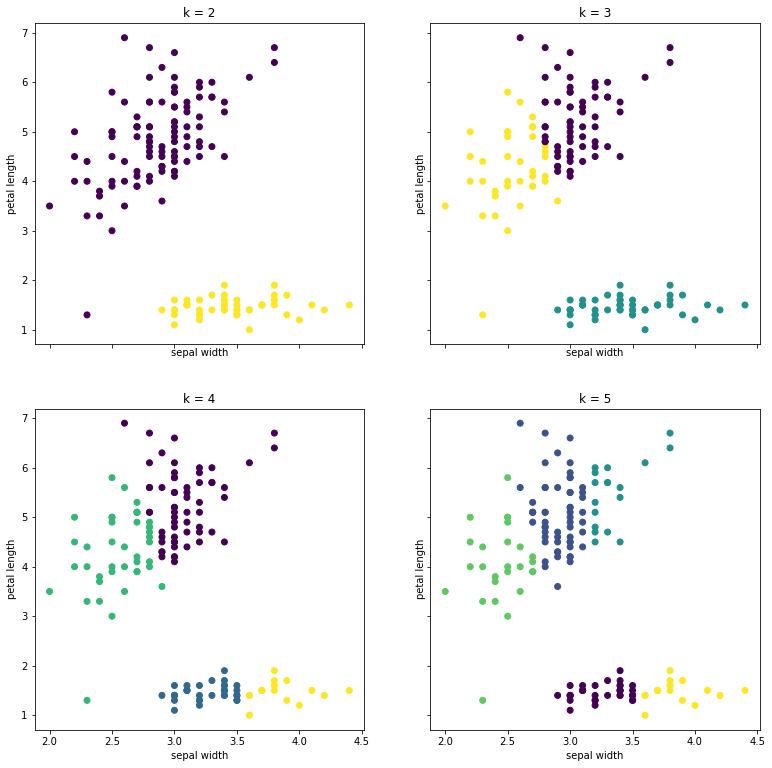

In [64]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal length')

In [66]:
# define the independent variables for k-means
# change features to 3 different features

X = iris[['sepal_width', 'petal_length', 'petal_width',]]
X.head()

,sepal_width,petal_length,petal_width
1,3.5,1.4,0.2
2,3.0,1.4,0.2
3,3.2,1.3,0.2
4,3.1,1.5,0.2
5,3.6,1.4,0.2


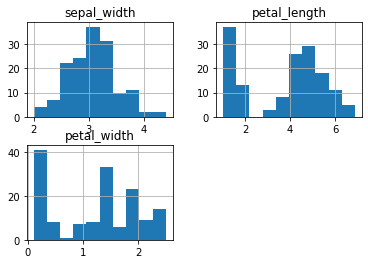

In [67]:
# look at distribution of x

X.hist();

In [78]:
# Scale the X before modeling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,sepal_width,petal_length,petal_width
1,1.019004,-1.340227,-1.315444
2,-0.131979,-1.340227,-1.315444
3,0.328414,-1.397064,-1.315444
4,0.098217,-1.283389,-1.315444
5,1.249201,-1.340227,-1.315444


In [79]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=4, random_state = 123, verbose = 0)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3,
       3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3], dtype=int32)

In [80]:
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)
iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
133,6.4,2.8,5.6,2.2,virginica,3
7,4.6,3.4,1.4,0.3,setosa,2
97,5.7,2.9,4.2,1.3,versicolor,1
122,5.6,2.8,4.9,2.0,virginica,3
10,4.9,3.1,1.5,0.1,setosa,2
118,7.7,3.8,6.7,2.2,virginica,3
112,6.4,2.7,5.3,1.9,virginica,1
105,6.5,3.0,5.8,2.2,virginica,3
3,4.7,3.2,1.3,0.2,setosa,2
24,5.1,3.3,1.7,0.5,setosa,2


In [81]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 1.60495976, -1.30664077, -1.2197118 ],
       [-0.89077623,  0.35226574,  0.24464085],
       [ 0.26264355, -1.30368818, -1.28253625],
       [ 0.1182344 ,  1.00493513,  1.07682758]])

In [82]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,sepal_width,petal_length,petal_width
0,1.604960,-1.306641,-1.219712
1,-0.890776,0.352266,0.244641
2,0.262644,-1.303688,-1.282536
3,0.118234,1.004935,1.076828


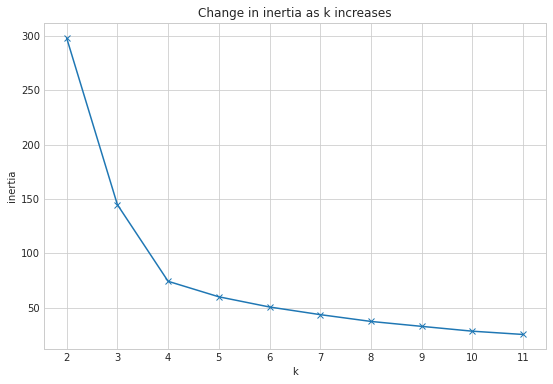

In [85]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

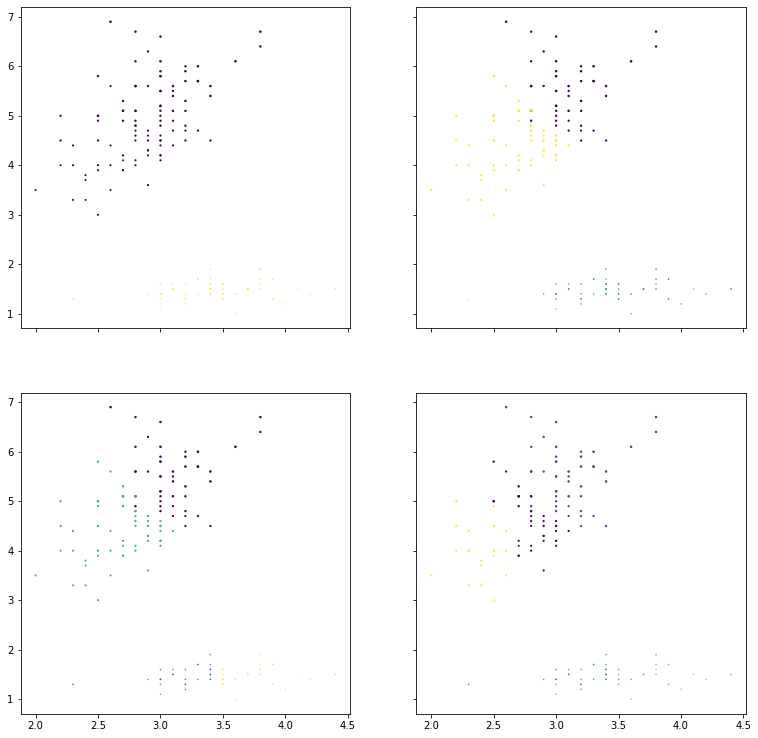

In [89]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_length, X.petal_width, c=clusters)
    

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [92]:
# import env to read from SQL DB
import env
# import mall dataset
# SQL query:
db_name = "mall_customers"
query = 'SELECT * FROM customers'

url  = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db_name}'
df = pd.read_sql(query, url, index_col="customer_id")

In [93]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [94]:
# Encode gender
df.gender = df.gender.apply(lambda x: 1 if x == "Female" else 0)

In [95]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [98]:
# split data
train_validate, test = train_test_split(df, train_size=.80, random_state=123)
train, validate = train_test_split(train_validate, random_state=123)

train.shape, validate.shape, test.shape

train.head()

,gender,age,annual_income,spending_score
customer_id,,,,
64,1,54,47,59
49,1,29,40,42
25,1,54,28,14
137,1,44,73,7
177,0,58,88,15


In [101]:
# Start w/ empty copies to retain the original splits
train_scaled = train.copy()
validate_scaled = validate.copy()
test_scaled = test.copy()


In [99]:
# Scale the datasets
scaler = MinMaxScaler()
cols = train.drop(columns=["gender"]).columns.tolist()


In [102]:
train_scaled[cols] = scaler.fit_transform(train[cols])
validate_scaled[cols] = scaler.transform(validate[cols])
test_scaled[cols] = scaler.transform(test[cols])

In [103]:
# Add back in the gender column to the dataframes
train_scaled["gender"] = train.gender.copy()
validate_scaled["gender"] = validate.gender.copy()
test_scaled["gender"] = test.gender.copy()


In [104]:
train_scaled.head()

,gender,age,annual_income,spending_score
customer_id,,,,
64,1,0.692308,0.262295,0.617021
49,1,0.211538,0.204918,0.436170
25,1,0.692308,0.106557,0.138298
137,1,0.500000,0.475410,0.063830
177,0,0.769231,0.598361,0.148936


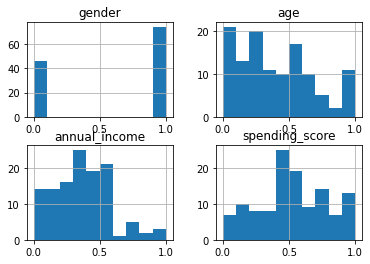

In [105]:
train_scaled.hist();

In [106]:
X = train_scaled

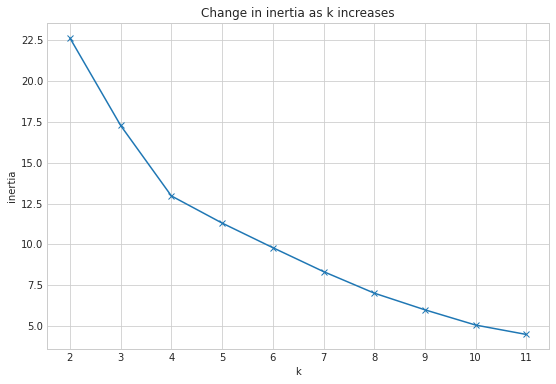

In [111]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [112]:
# 4 looks like a good number for K

In [114]:
# Fit K-Means

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train_scaled['cluster'] = kmeans.labels_

train_scaled.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
64,1,0.692308,0.262295,0.617021,2
49,1,0.211538,0.204918,0.436170,1
25,1,0.692308,0.106557,0.138298,2
137,1,0.500000,0.475410,0.063830,2
177,0,0.769231,0.598361,0.148936,0


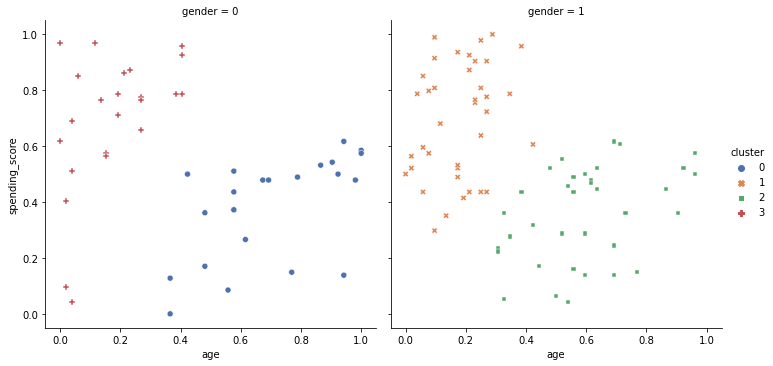

In [115]:
sns.relplot(x="age", y="spending_score", style="cluster", hue="cluster", col="gender", palette="deep",
            data=train_scaled)


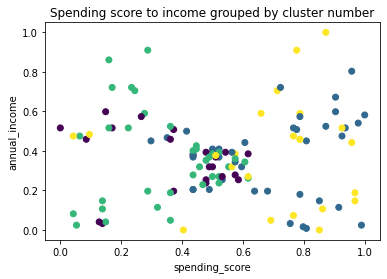

In [116]:

plt.title("Spending score to income grouped by cluster number")
plt.scatter(train_scaled.spending_score, train_scaled.annual_income, c=train_scaled.cluster)
plt.xlabel("spending_score")
plt.ylabel("annual_income")
plt.show()


3. How does scaling impact the results of clustering?

    Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

Bonus
    
    a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
   
    b) Visualize the data and guess the number and shape of the clusters.
    
    c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
   
    d) Repeat the step above but with scaled data.
    
    c) Write down the takeaways from this exercise.


